In [9]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [16]:
AND(0,0), AND(1,0), AND(0,1), AND(1,1)

(0, 0, 0, 1)

In [17]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [18]:
AND(0,0), AND(1,0), AND(0,1), AND(1,1)

(0, 0, 0, 1)

In [19]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [20]:
NAND(0,0), NAND(1,0), NAND(0,1), NAND(1,1)

(1, 1, 1, 0)

In [21]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [22]:
OR(0,0), OR(1,0), OR(0,1), OR(1,1)

(0, 1, 1, 1)

In [23]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)

    return y

In [24]:
XOR(0,0), XOR(1,0), XOR(0,1), XOR(1,1)

(0, 1, 1, 0)

In [25]:
def sigmoid(x):
    return 1 / (1+ np.exp(-x))

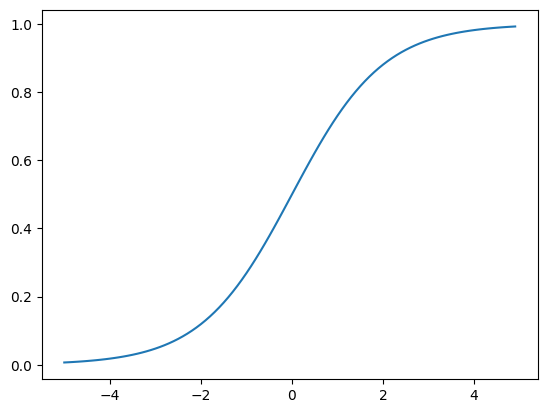

In [26]:
import matplotlib.pyplot as plt
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [27]:
def relu(x):
    return np.maximum(0, x)

In [28]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])

X.shape, W.shape

((2,), (2, 3))

In [29]:
np.dot(X, W)

array([ 5, 11, 17])

In [31]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [32]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [33]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)


(3,)
(3, 2)
(2,)


In [34]:
def identity_function(x):
    return X

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [37]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [38]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [39]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([1. , 0.5])

In [40]:
def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

In [41]:
softmax([1, 2, 3])

array([0.09003057, 0.24472847, 0.66524096])

In [42]:
np.exp(10), np.exp(100), np.exp(1000)

/tmp/ipykernel_6126/1145674931.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(10), np.exp(100), np.exp(1000)


(22026.465794806718, 2.6881171418161356e+43, inf)

In [43]:
softmax([10, 100, 1000])

/tmp/ipykernel_6126/675541793.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(a) / np.sum(np.exp(a))
/tmp/ipykernel_6126/675541793.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(a) / np.sum(np.exp(a))


array([ 0.,  0., nan])

In [44]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a / np.sum(exp_a)

In [45]:
softmax([10, 100, 1000])

array([0., 0., 1.])

In [47]:
import pandas as pd

df_train = pd.read_csv('/home/verlo/dev_ws/MachineLearning/data/mnist_train.csv')
df_test = pd.read_csv('/home/verlo/dev_ws/MachineLearning/data/mnist_test.csv')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [48]:
X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])

In [49]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [50]:
img = X_train[0]
label = y_train[0]

img = img.reshape(28, 28)
img_show(img)

In [71]:
import pickle

def init_network():
    with open("/home/verlo/dev_ws/DeepLearning/data/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [72]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [73]:
network = init_network()
accuracy_cnt = 0

for i in range(len(X_train)):
    y_pred = predict(network, X_train[i])
    p = np.argmax(y_pred)
    if p == y_train[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(X_train)))

/tmp/ipykernel_6126/3708446755.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1+ np.exp(-x))


Accuracy:0.9251833333333334


In [74]:
y_batch.shape

(2,)

In [75]:
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = predict(network, X_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == y_train[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(X_train)))

/tmp/ipykernel_6126/3708446755.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1+ np.exp(-x))


Accuracy:0.9251833333333334
